In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import the dataset
df = pd.read_csv('train.csv')  

In [3]:
# Print the first few rows of the dataset
print(df.head())

    player_id                 name  age gender    country height  weight  \
0   PLID_4964           Keva Horan   23      M    Ukraine    6'2  176lbs   
1  PLID_11234           Herma Tann   18      M     Russia   5'10  148lbs   
2  PLID_19127         Eilene Kizer   16      F      Spain    6'2  172lbs   
3  PLID_17467       Andrea Badgett   27      M      Chile   5'11  165lbs   
4   PLID_9661  Jeremiah Bumbalough   19      F  Argentina    5'8  158lbs   

   ball_controlling_skills  body_reflexes  body_balance  ...  strong_foot  \
0                     77.0           58.0          47.0  ...        Right   
1                     54.0           69.0          70.0  ...          Any   
2                     34.0           43.0          45.0  ...         Left   
3                     79.0           73.0          76.0  ...        Right   
4                     47.0           61.0          74.0  ...        Right   

   behaviour_rating  matches_played  fitness_rating  trophies_won  \
0          

In [4]:
# Get the number of attributes (columns)
num_attributes = df.shape[1]

print("Number of attributes:", num_attributes)

Number of attributes: 30


In [5]:
# Get the column names
column_names = df.columns

print("Column names:", column_names)

Column names: Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')


In [6]:
# Get the data types of the columns
data_types = df.dtypes

print("Data types:")
print(data_types)

Data types:
player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                  

In [7]:
# Get a basic statistical summary of numeric columns
numeric_summary = df.describe()

print("Basic Statistical Summary:")
print(numeric_summary)

Basic Statistical Summary:
                age  ball_controlling_skills  body_reflexes  body_balance  \
count  13994.000000             13581.000000   13994.000000  13994.000000   
mean      21.135844                56.043958      61.934329     62.753323   
std        5.162719                16.787353      14.931963     14.203638   
min       16.000000                 5.000000      12.000000      9.000000   
25%       17.000000                51.000000      54.000000     55.000000   
50%       20.000000                61.000000      64.000000     65.000000   
75%       24.000000                67.000000      72.000000     73.000000   
max       61.000000                95.000000      96.000000     97.000000   

       jumping_skills  penalties_conversion_rate  mental_strength  \
count    13970.000000               13964.000000     13966.000000   
mean        63.612026                  48.495703        56.768366   
std         11.938712                  15.767506        11.977744   
min

In [8]:
# Find missing values
missing_values = df.isnull()

print("Missing values:")
print(missing_values)

Missing values:
       player_id   name    age  gender  country  height  weight  \
0          False  False  False   False    False   False   False   
1          False  False  False   False    False   False   False   
2          False  False  False   False    False   False   False   
3          False  False  False   False    False   False   False   
4          False  False  False   False    False   False   False   
...          ...    ...    ...     ...      ...     ...     ...   
13989      False  False  False   False    False   False   False   
13990      False  False  False   False    False   False   False   
13991      False  False  False   False    False   False   False   
13992      False  False  False   False    False   False   False   
13993      False  False  False   False    False   False   False   

       ball_controlling_skills  body_reflexes  body_balance  ...  strong_foot  \
0                        False          False         False  ...        False   
1                

In [9]:
# Find the number of missing values in each column
missing_values_count = df.isnull().sum()

print("Number of Missing Values:")
print(missing_values_count)

Number of Missing Values:
player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection        

In [10]:
# Assuming your dataset is stored in a DataFrame called 'df'
df['gender'] = df['gender'].fillna(df['gender'].mode().values[0])

# Verify if the missing values have been imputed
print(df['gender'].isnull().sum())

0


In [11]:
# Remove non-numeric characters from the "weight" column
df['weight'] = df['weight'].str.replace('\D', '', regex=True)

# Convert the "weight" column to float
df['weight'] = df['weight'].astype(float)

# Calculate the median of non-missing values
median_weight = df['weight'].median()

# Impute missing values with the median weight
df['weight'] = df['weight'].fillna(median_weight)

# Verify if the missing values have been imputed
print(df['weight'].isnull().sum())

0


In [12]:
# Assuming your dataset is stored in a DataFrame called 'df'
df['strong_foot'] = df['strong_foot'].fillna(df['strong_foot'].mode().values[0])

# Verify if the missing values have been imputed
print(df['strong_foot'].isnull().sum())

0


In [13]:
# Calculate the mean of non-missing values
mean_matches_played = df['matches_played'].mean()

# Impute missing values with the mean matches played
df['matches_played'] = df['matches_played'].fillna(mean_matches_played)

# Impute missing values with zero if related to players who have never played matches
df.loc[df['matches_played'].isnull(), 'matches_played'] = 0

# Verify if the missing values have been imputed
print(df['matches_played'].isnull().sum())

0


In [14]:
# Drop all rows with missing values
df_cleaned = df.dropna()

# Verify if the missing values have been removed
print(df_cleaned.isnull().sum())

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64


In [27]:
# Removing duplicates
df = df.drop_duplicates()


In [33]:
# Select the numerical variables for which you want to generate box plots
numerical_columns = ['ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills']

# Generate box plots for the selected numerical columns
df[numerical_columns].boxplot()

# Set the title and labels for the box plot
plt.title('Box Plot for Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Value')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the box plot
plt.show()

AssertionError: 3

In [34]:
# Select the numerical columns for box plots
numerical_columns = ['ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills']

# Check for missing data in the selected numerical columns
missing_values = df[numerical_columns].isnull().sum()
print(missing_values)

# Convert data types if necessary
df[numerical_columns] = df[numerical_columns].astype(float)

# Generate box plots for the selected numerical columns
df[numerical_columns].boxplot()

# Set the title and labels for the box plot
plt.title('Box Plot for Numerical Variables')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.xticks(rotation=45)

# Show the plot
plt.show()

ball_controlling_skills    413
body_reflexes                0
body_balance                 0
jumping_skills              24
dtype: int64


AssertionError: 3

ball_controlling_skills    413
body_reflexes                0
body_balance                 0
jumping_skills              24
dtype: int64


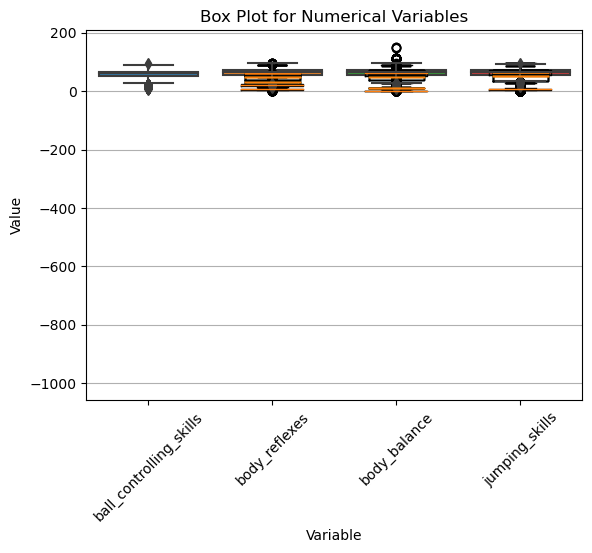

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame called 'df'
# Select the numerical columns for box plots
numerical_columns = ['ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills']

# Check for missing data in the selected numerical columns
missing_values = df[numerical_columns].isnull().sum()
print(missing_values)

# Convert data types if necessary
df[numerical_columns] = df[numerical_columns].astype(float)

# Generate box plots for the selected numerical columns using seaborn
sns.boxplot(data=df[numerical_columns])

# Set the title and labels for the box plot
plt.title('Box Plot for Numerical Variables')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.xticks(rotation=45)

# Show the plot
plt.show()

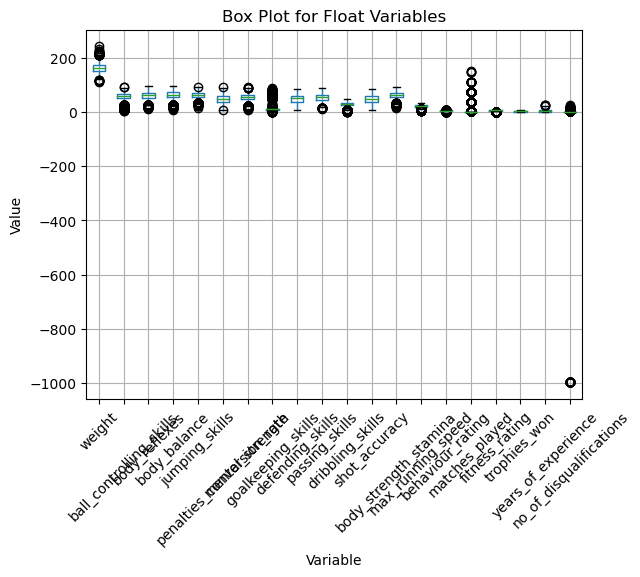

In [37]:
# Filter float columns from the DataFrame
float_columns = df.select_dtypes(include=['float']).columns

# Generate box plots for the float columns
df[float_columns].boxplot()

# Set the title and labels for the box plot
plt.title('Box Plot for Float Variables')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Assuming your data is stored in a pandas DataFrame called 'df'

# Split the data into features (X) and target (y)
X = df.drop(columns=['selection'])
y = df['selection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
# Option 1: Drop rows or columns with missing values
# X_train = X_train.dropna(axis=0)  # drop rows with missing values
# X_train = X_train.dropna(axis=1)  # drop columns with missing values

# Option 2: Impute missing values
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# X_train = imputer.fit_transform(X_train)

# Numeric feature scaling
scaler = StandardScaler()  # or MinMaxScaler() depending on your requirements
numeric_features = ['age', 'selection']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Categorical feature encoding
categorical_features = ['gender', 'coaching', 'dedication_level']
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train[categorical_features])
encoded_features_train = encoder.transform(X_train[categorical_features]).toarray()
encoded_features_test = encoder.transform(X_test[categorical_features]).toarray()

# Create a new DataFrame by concatenating the encoded features with the numeric features
X_train = pd.concat([pd.DataFrame(encoded_features_train), X_train.drop(columns=categorical_features)], axis=1)
X_test = pd.concat([pd.DataFrame(encoded_features_test), X_test.drop(columns=categorical_features)], axis=1)

# Feature scaling (optional)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Perform further preprocessing or train your machine learning model

KeyError: "['selection'] not in index"

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your preprocessed data is stored in variables X_train, X_test, y_train, y_test

# Define your model
model = RandomForestClassifier()

# List of hyperparameters to tune
param_grid = {
   'n_estimators': [100, 200, 300],
   'max_depth': [5, 10, None]
}

# Grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\mzuba\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'PLID_20408'

--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\mzuba\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\mzuba\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'PLID_18489'


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a preprocessed and trained model stored in 'best_model'
# Assuming you also have preprocessed test data stored in 'X_test' and 'y_test'

# Define the hyperparameters to tune
param_grid = {
   'n_estimators': [100, 200, 300],
   'max_depth': [5, 10, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_tuned_model = grid_search.best_estimator_

# Make predictions on the test set using the best tuned model
y_pred = best_tuned_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

NameError: name 'best_model' is not defined